In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

owd = os.getcwd()

In [2]:
os.chdir('../DATA')
all_stats = []
path = 'HeadConcatenation'
baselines = os.listdir(path)
baselines.sort()
for i in range(len(baselines)):
    categories = os.listdir(os.path.join(path, baselines[i], 'stats'))
    all_stats.append([])
    for j in range(len(categories)):
        variants = os.listdir(os.path.join(path, baselines[i], 'stats', categories[j]))
        all_stats[i].append([])
        for k in range(len(variants)):
            trials = os.listdir(os.path.join(path, baselines[i], 'stats', categories[j], variants[k]))
            all_stats[i][j].append([])
            for l in range(len(trials)):
                stat = np.load(os.path.join(path, baselines[i], 'stats', categories[j], variants[k], trials[l]), allow_pickle=True)
                all_stats[i][j][k].append(stat.tolist())
all_stats = np.array(all_stats).squeeze().transpose([3, 0, 1, 2])
print(all_stats.shape)
os.chdir(owd)

(11, 8, 2, 10)


In [22]:
aurocs = np.array(all_stats[1].tolist())
aurocs = aurocs.transpose([3, 1, 0, 2])[1]
auroc_std = np.std(aurocs, axis=2)
aurocs = np.mean(aurocs, axis=2)
auprs = np.array(all_stats[2].tolist())
auprs = auprs.transpose([3, 1, 0, 2])[1]
aupr_std = np.std(auprs, axis=2)
auprs = np.mean(auprs, axis=2)
snrs = np.array(all_stats[3].tolist())
snrs = snrs.transpose([3, 1, 0, 2])[1]
snr_std = np.nan_to_num(np.std(snrs, axis=2))
snrs = np.nan_to_num(np.mean(snrs, axis=2))

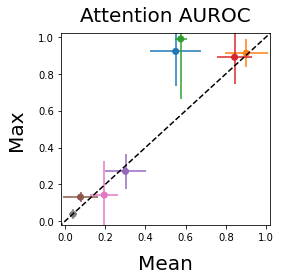

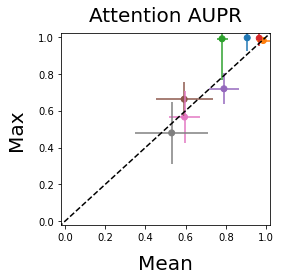

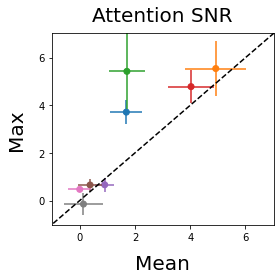

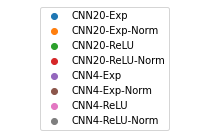

In [24]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
plt.rcParams['ytick.labelsize'] = 10

try:
    os.makedirs('HeadConcatentation/')
except:
    pass

fig = plt.figure(figsize=(4,4))
ax = fig.subplots(1, 1)
for i in range(len(aurocs[0])):
    ax.errorbar(aurocs[0][i], aurocs[1][i], auroc_std[0][i], auroc_std[1][i], ls='none', label=baselines[i], color=colors[i])
ax.scatter(aurocs[0], aurocs[1], label=categories, color=colors)
ax.set_xlim([-0.02,1.02])
ax.set_ylim([-0.02,1.02])
ax.plot([-10, 30], [-10, 30], linestyle='--', color='black')
ax.set_xlabel('Mean', fontsize=20, labelpad=12)
ax.set_title('Attention AUROC', fontsize=20, pad=12)
ax.set_ylabel('Max', fontsize=20, labelpad=12)
fig.tight_layout()
fig.savefig('HeadConcatentation/AUROC.pdf', format='pdf', dpi=300)

fig = plt.figure(figsize=(4,4))
ax = fig.subplots(1, 1)
for i in range(len(auprs[0])):
    ax.errorbar(auprs[0][i], auprs[1][i], aupr_std[0][i], aupr_std[1][i], ls='none', label=baselines[i], color=colors[i])
ax.scatter(auprs[0], auprs[1], label=categories, color=colors)
ax.set_xlim([-0.02,1.02])
ax.set_ylim([-0.02,1.02])
ax.plot([-10, 30], [-10, 30], linestyle='--', color='black')
ax.set_xlabel('Mean', fontsize=20, labelpad=12)
ax.set_title('Attention AUPR', fontsize=20, pad=12)
ax.set_ylabel('Max', fontsize=20, labelpad=12)
fig.tight_layout()
fig.savefig('HeadConcatentation/AUPR.pdf', format='pdf', dpi=300)

fig = plt.figure(figsize=(4,4))
ax = fig.subplots(1, 1)
for i in range(len(snrs[0])):
    ax.errorbar(snrs[0][i], snrs[1][i], snr_std[0][i], snr_std[1][i], ls='none', label=baselines[i], color=colors[i])
ax.scatter(snrs[0], snrs[1], label=categories, color=colors)
ax.set_xlim([-1.02,7.02])
ax.set_ylim([-1.02,7.02])
ax.plot([-10, 30], [-10, 30], linestyle='--', color='black')
ax.set_xlabel('Mean', fontsize=20, labelpad=12)
ax.set_title('Attention SNR', fontsize=20, pad=12)
ax.set_ylabel('Max', fontsize=20, labelpad=12)
ax.set_yticks([0, 2, 4, 6])
fig.tight_layout()
fig.savefig('HeadConcatentation/SNR.pdf', format='pdf', dpi=300)




fig = plt.figure(figsize=(3, 2))
ax = fig.subplots(1, 1)
bars = []
for i in range(len(aurocs[0])):
    b = ax.scatter(aurocs[0][i], aurocs[1][i], color=colors[i], label=baselines[i])
    bars.append(b)
ax.set_xlim([-0.8,8.8])
ax.set_ylim([-0.8,8.8])
ax.set_xlabel('GLIFAC', fontsize=20, labelpad=12)
ax.set_ylabel('Local Attention', fontsize=20, labelpad=12)
fig.legend(loc='center')
ax.axis('off')
for i in range(len(bars)):
    bars[i].remove()
fig.tight_layout()
fig.savefig('HeadConcatentation/legend.pdf', format='pdf', dpi=300)